In [2]:
import matplotlib.pyplot as plt
import polars as pl 
from matplotlib.axes import Axes

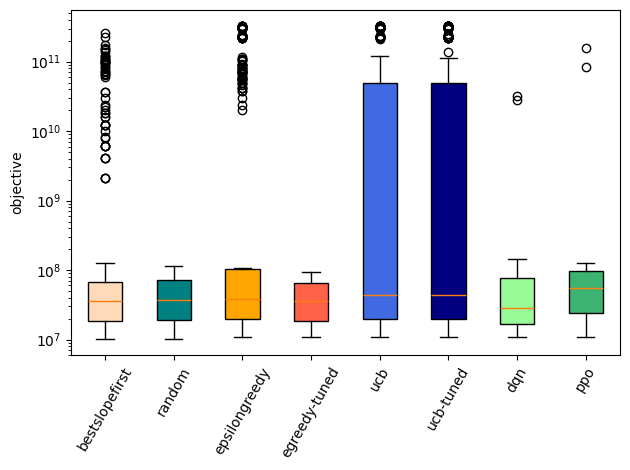

In [7]:
import numpy as np
df = pl.read_csv("../../logs/results-benchmarks.csv")
algos = ["bestslopefirst", "random", "epsilongreedy", "egreedy-tuned", "ucb", "ucb-tuned", "dqn", "ppo"]

colors = ["peachpuff", "teal", "orange", "tomato", "royalblue", "navy", "palegreen", "mediumseagreen"]
#algos = df["bandit"].unique().sort()
column = "integralPrimalGap"
column = "objective"
# algos = [algo for algo in algos if algo != "ucb"]
res = []
for algo in algos:
    algo_res = df.filter(pl.col("bandit") == algo)[column]
    res.append(algo_res)


labels = algos

fig, ax = plt.subplots()
ax.set_ylabel(column)
if column == "objective":
    ax.set_yscale("log")


bplot = ax.boxplot(
    res,
    patch_artist=True,  # fill with color
    tick_labels=labels,
)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig(f"{column}.svg")
plt.show()



In [4]:
def violin_plot(ax_left: Axes, ax_right: Axes, df: pl.DataFrame, instance: str | None = None):
    if instance is not None:
        df = df.filter(pl.col('instance') == instance)
    data = []
    xlabels = []
    for algo in df["bandit"].unique().sort():
        xlabels.append(algo)
        df_algo = df.filter(pl.col('bandit') == algo)
        data.append(df_algo["objective"].to_numpy())
    ax_left.violinplot(data, showmeans=True, showmedians=False)
    ax_right.violinplot(data, showmeans=True, showmedians=False)
    
    ax_left.set_yscale('log')
    ax_left.set_xticks(range(1, len(xlabels) + 1))
    ax_left.set_xticklabels(xlabels)

    ax_right.set_yscale("linear")
    ax_right.set_xticks(range(1, len(xlabels) + 1))
    ax_right.set_xticklabels(xlabels)

def bar_plot(ax_left: Axes, ax_right: Axes, df: pl.DataFrame, instance: str | None = None):
    if instance is not None:
        df = df.filter(pl.col('instance') == instance)
    stats = df.group_by("bandit").agg(
        pl.mean("objective").alias("mean-objective"),
        pl.std("objective").alias("std-objective"),
        pl.mean("travelLength").alias("mean-route"),
        pl.std("travelLength").alias("std-route"),
    ).sort("bandit")
    
    ax_left.set_yscale("log")
    ax_right.set_yscale("linear")
    
    ax_left.bar(stats["bandit"], stats["mean-objective"], yerr=stats["std-objective"], capsize=5)
    ax_right.bar(stats["bandit"], stats["mean-objective"], yerr=stats["std-objective"], capsize=5)
    


## Averaged results

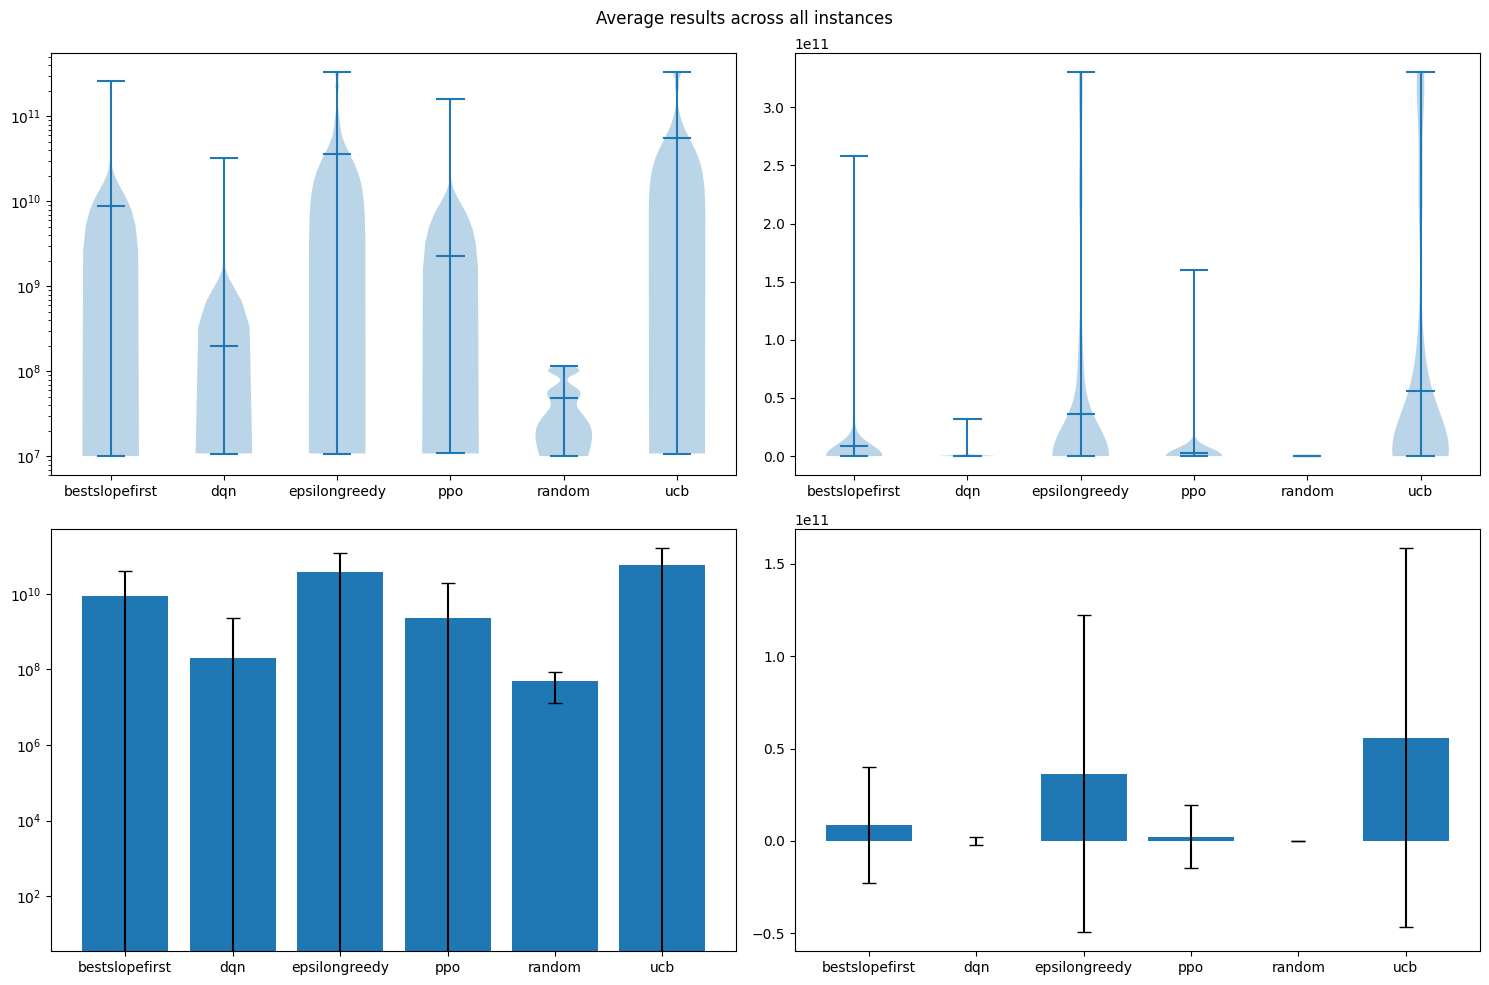

In [5]:
df = pl.read_csv("../../logs/results-benchmarks.csv")
fig, axes = plt.subplots(2, 2)
fig.suptitle("Average results across all instances")
fig.set_size_inches(15, 10)
violin_plot(axes[0, 0], axes[0, 1], df)
bar_plot(axes[1, 0], axes[1, 1], df)
plt.tight_layout()
plt.show()

# Stats by problem instance

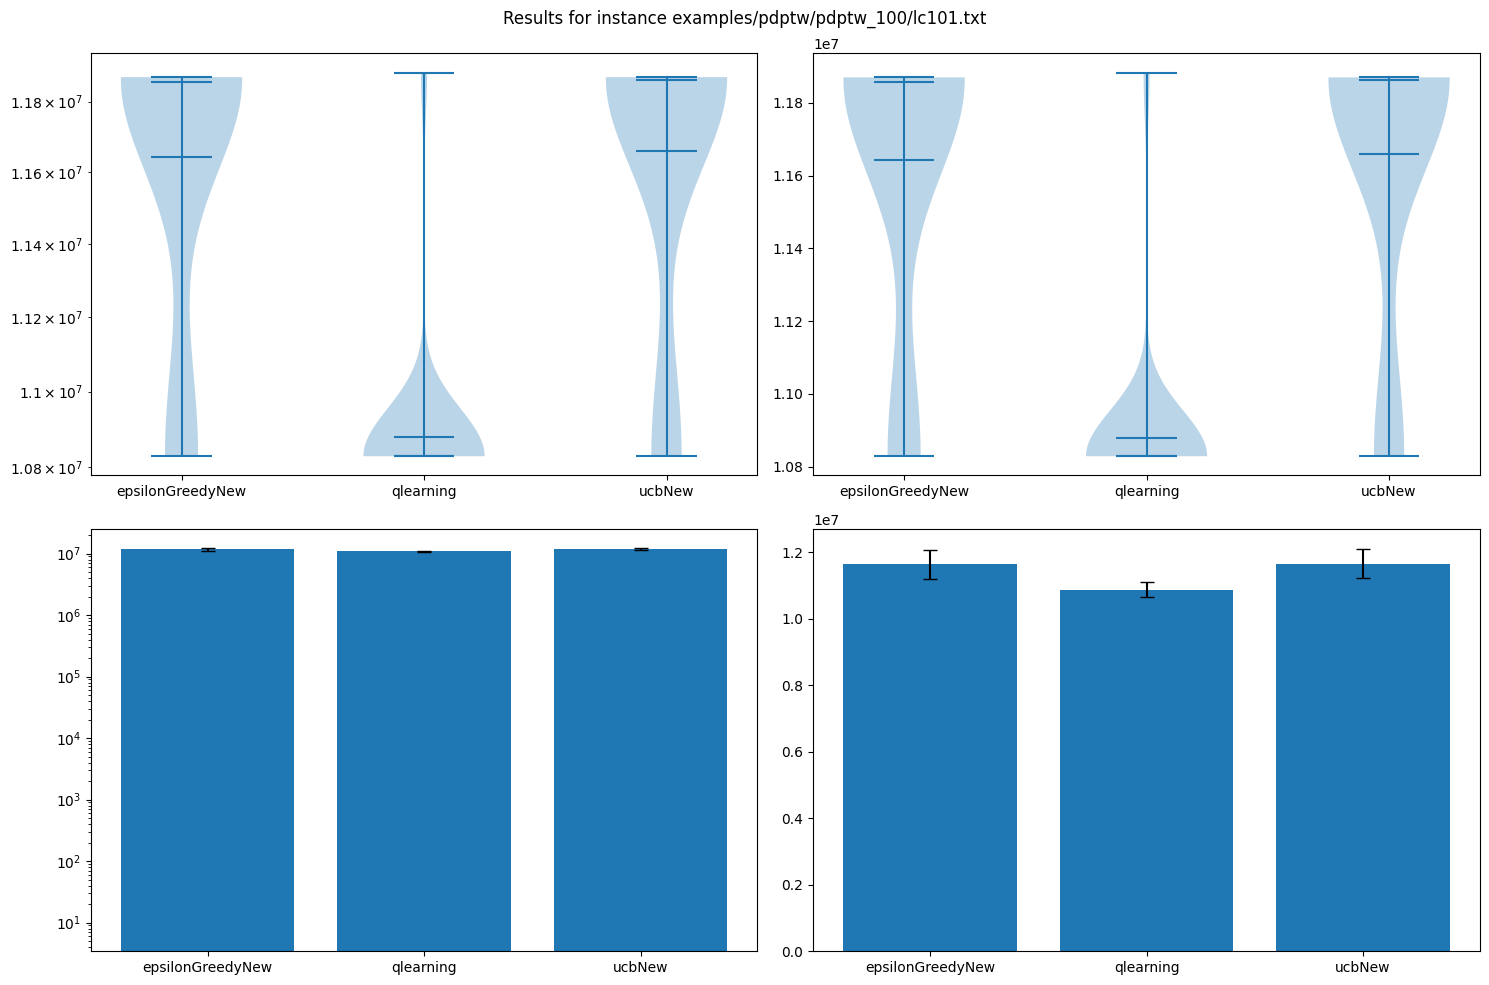

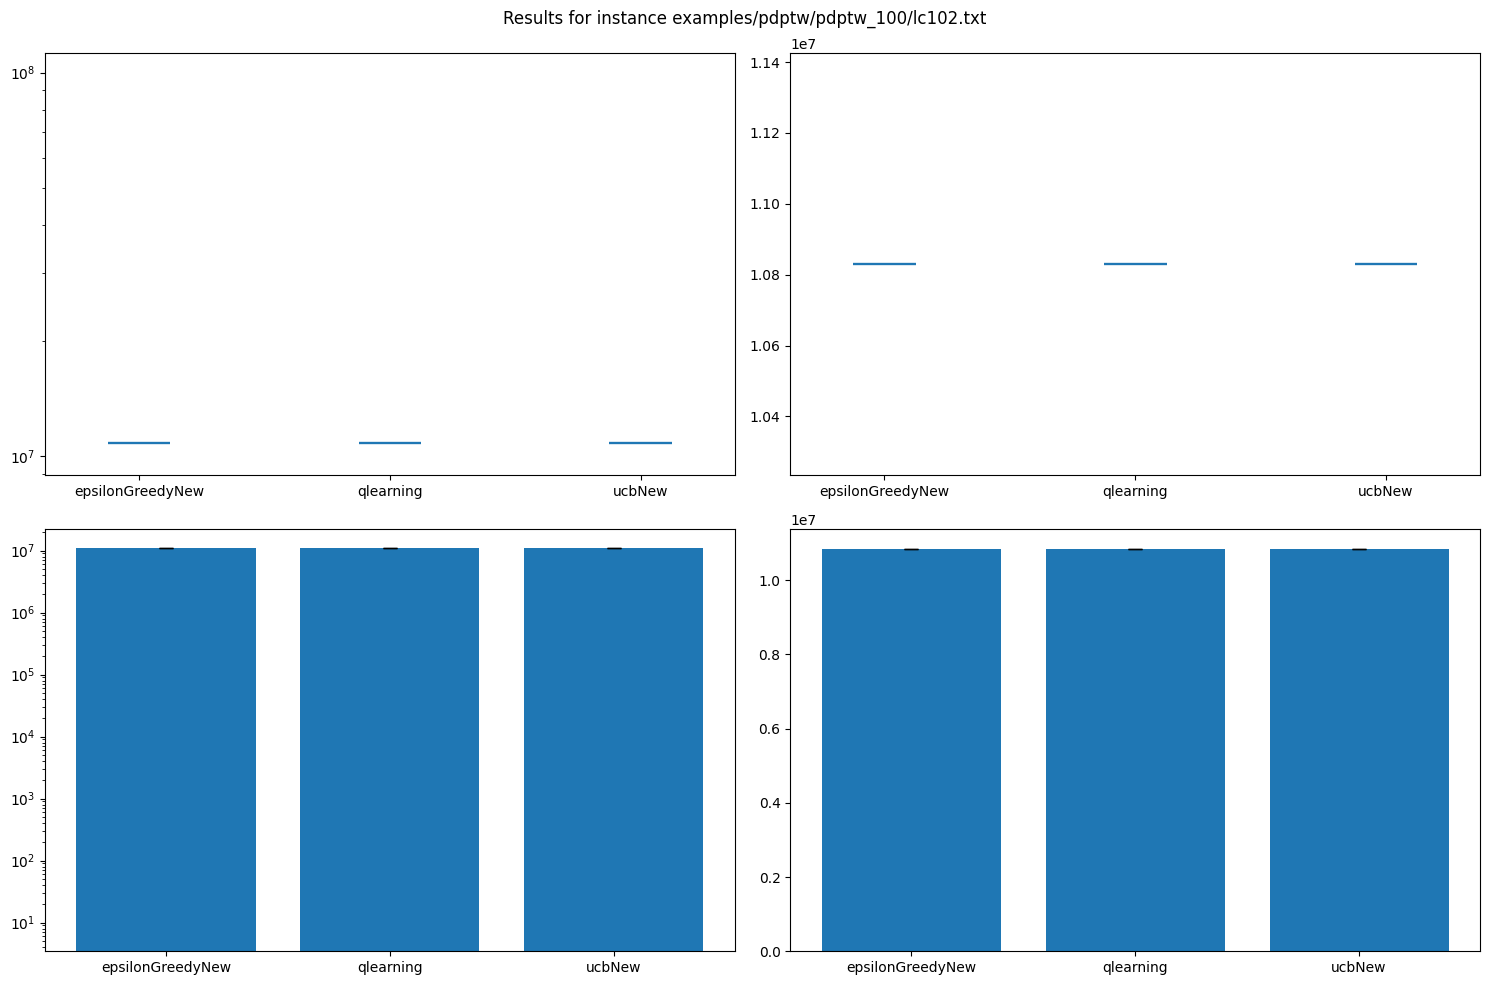

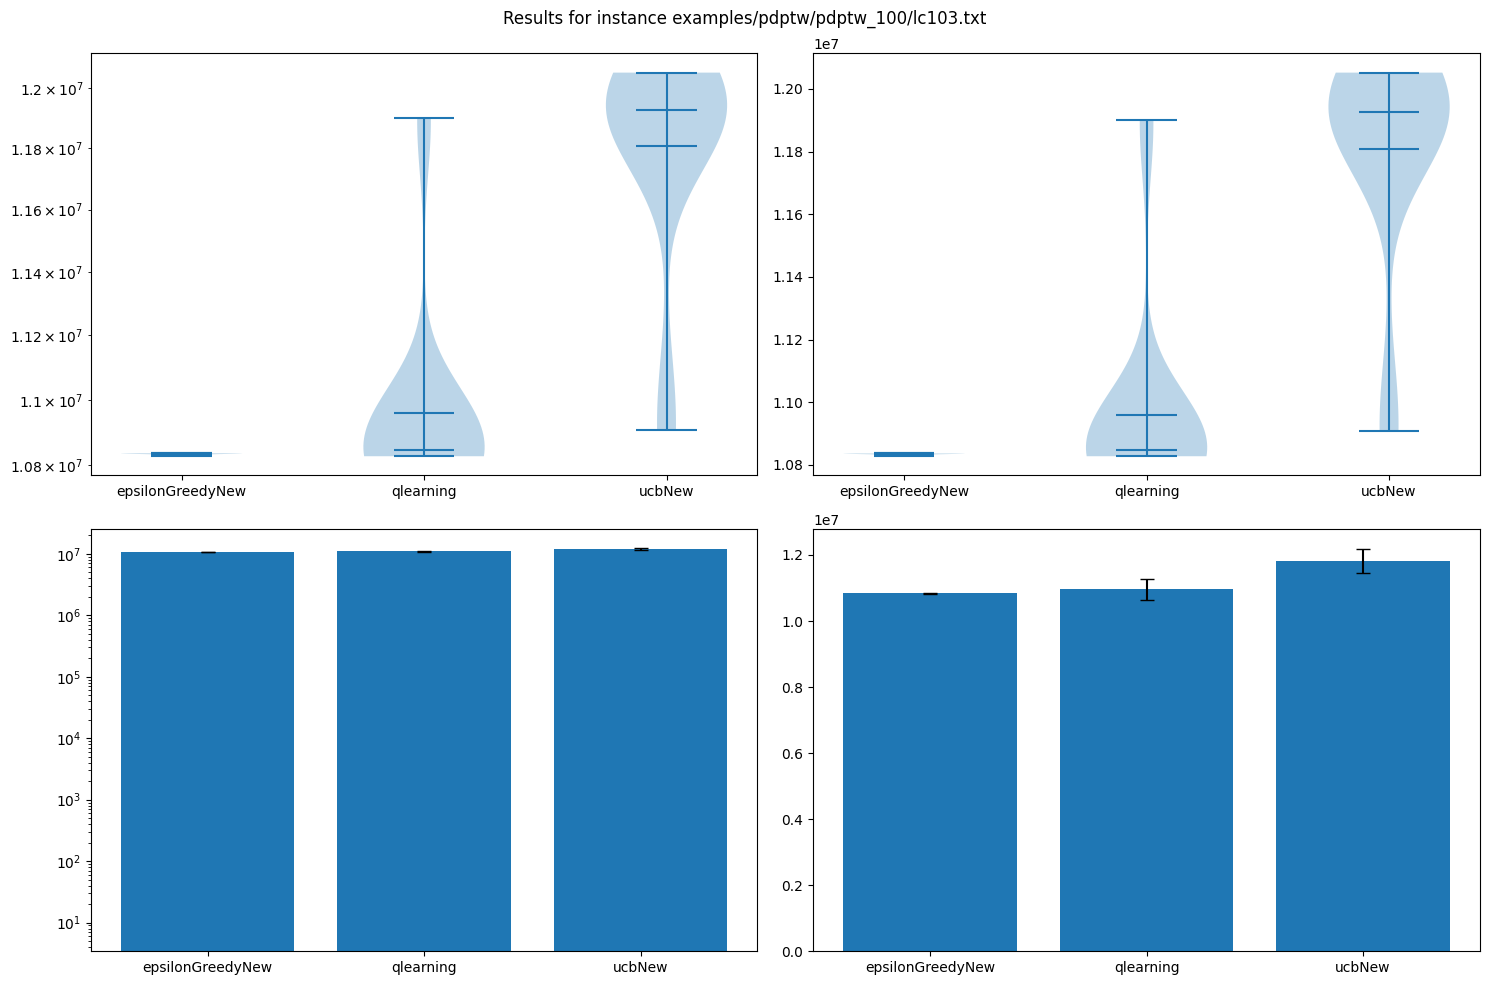

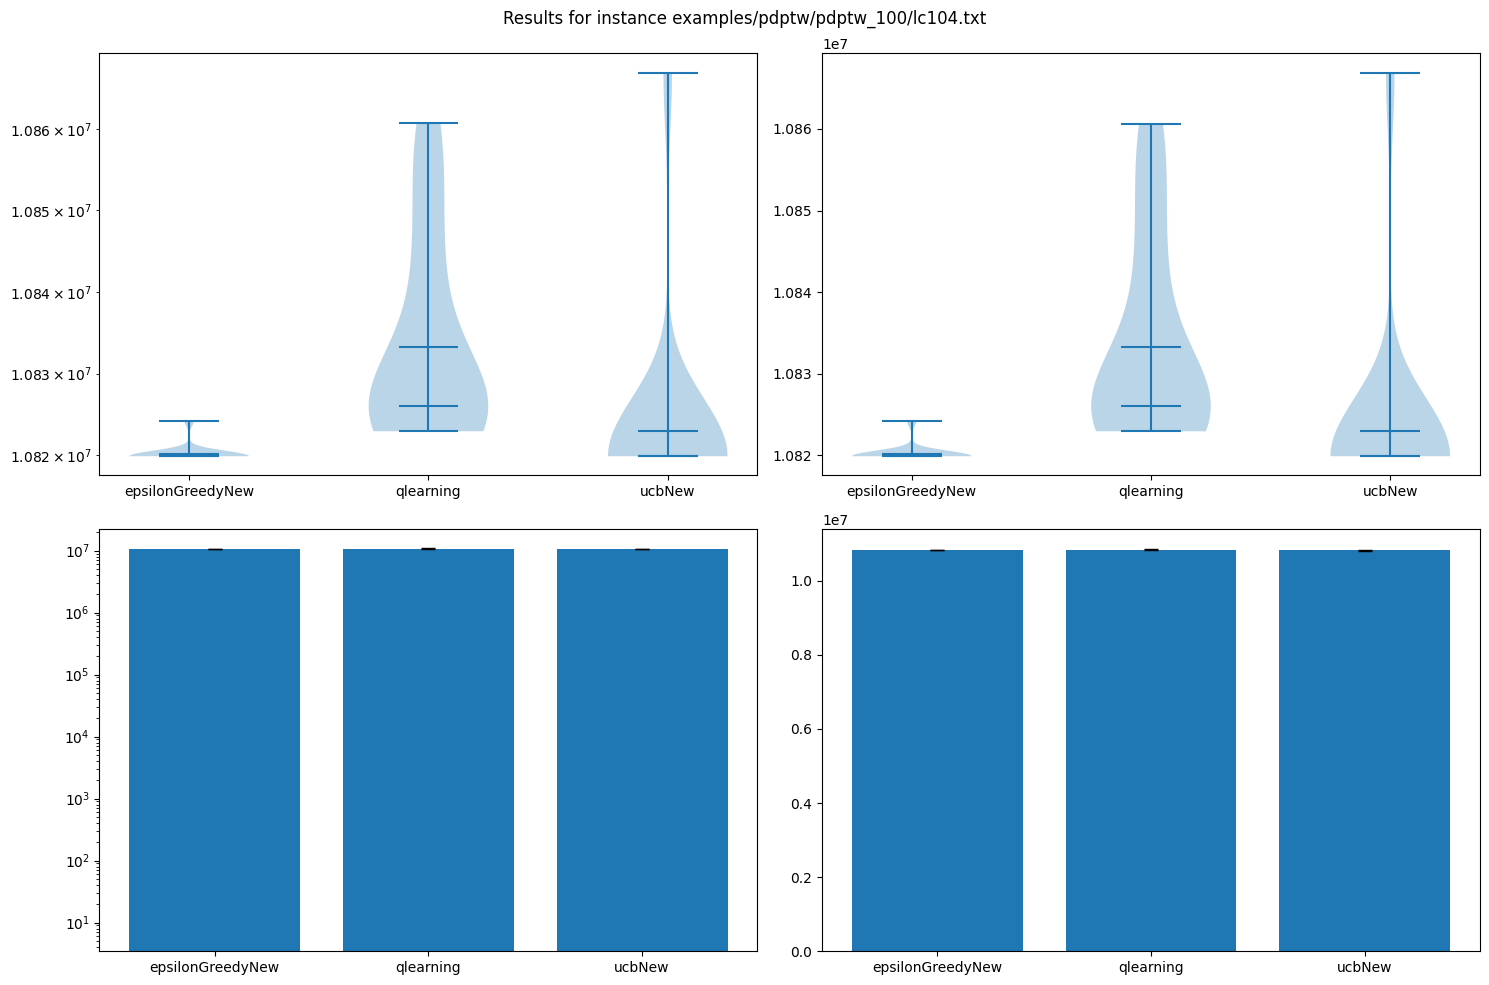

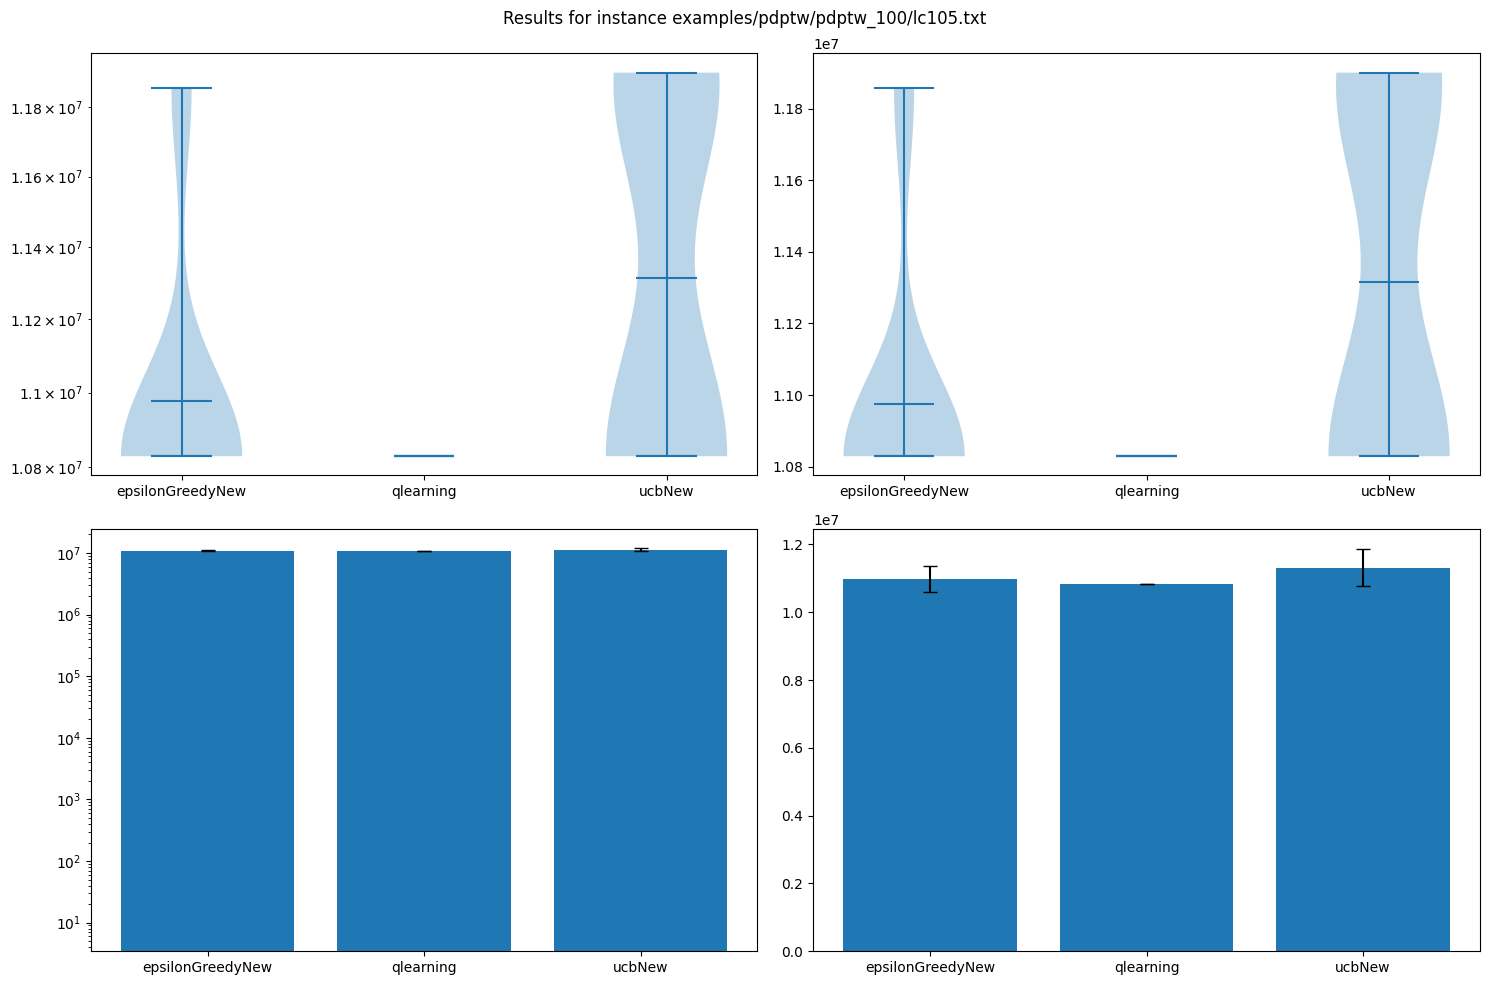

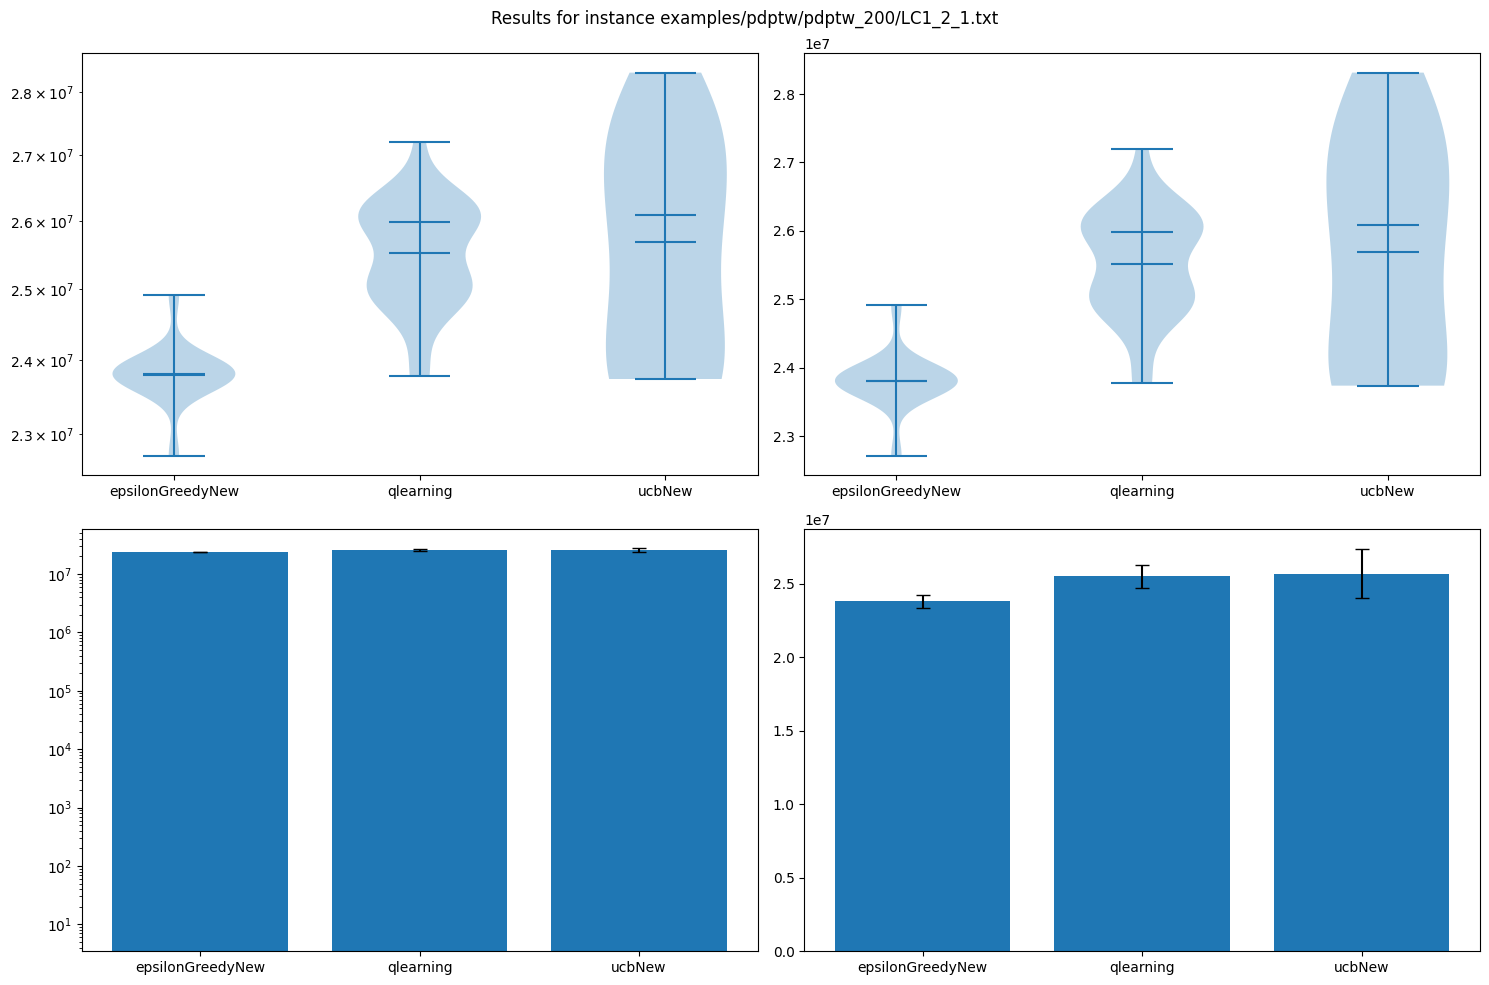

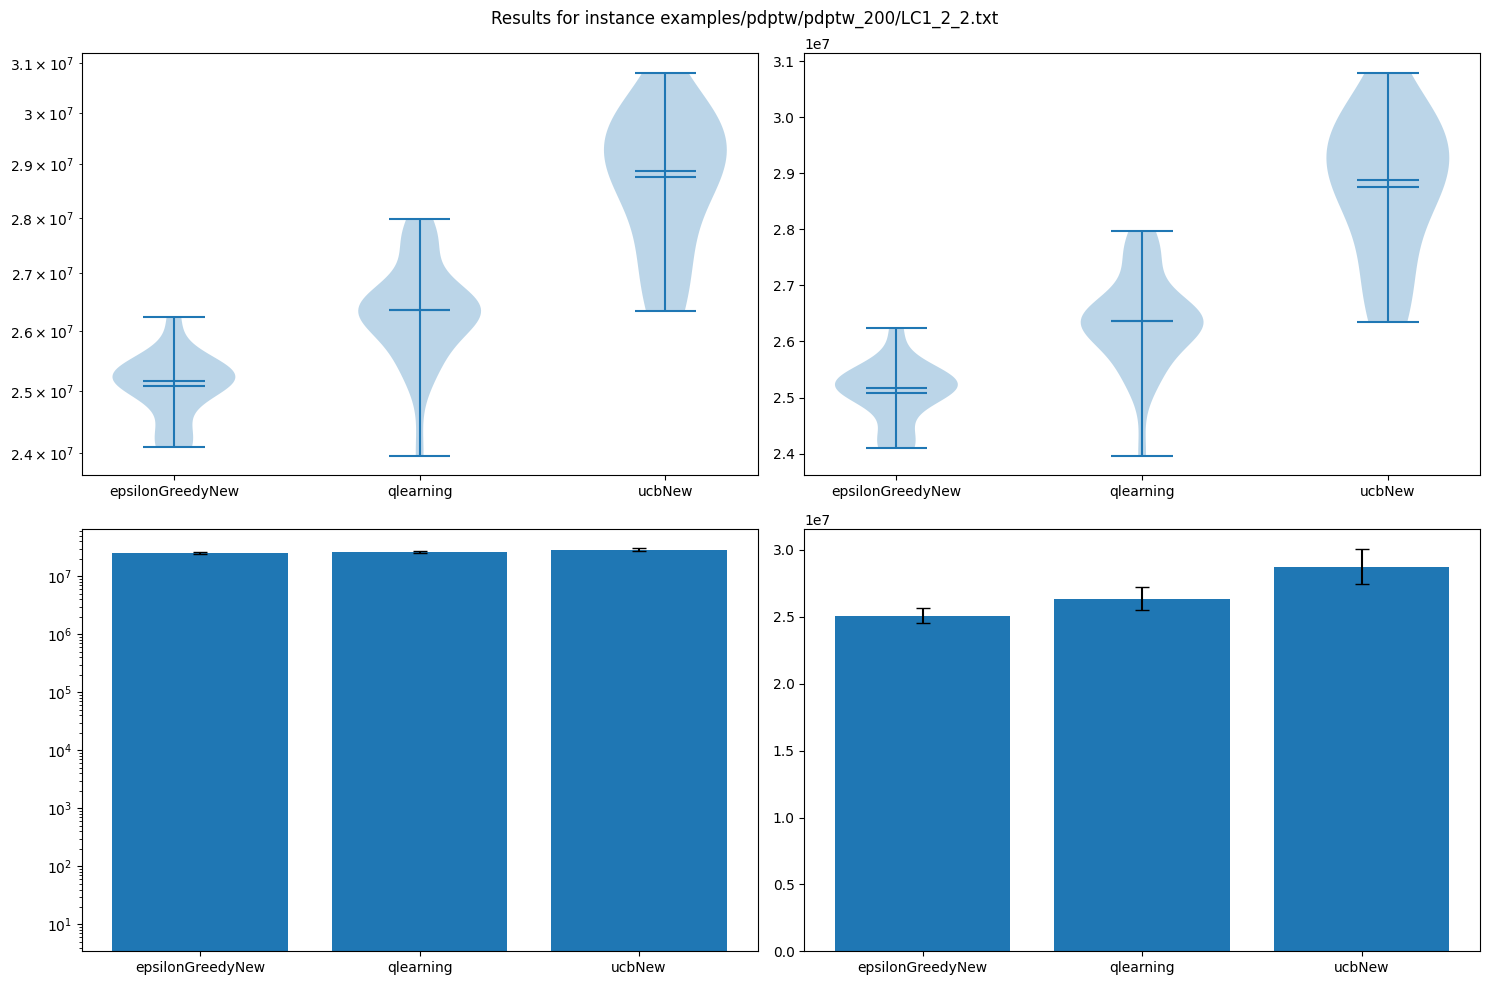

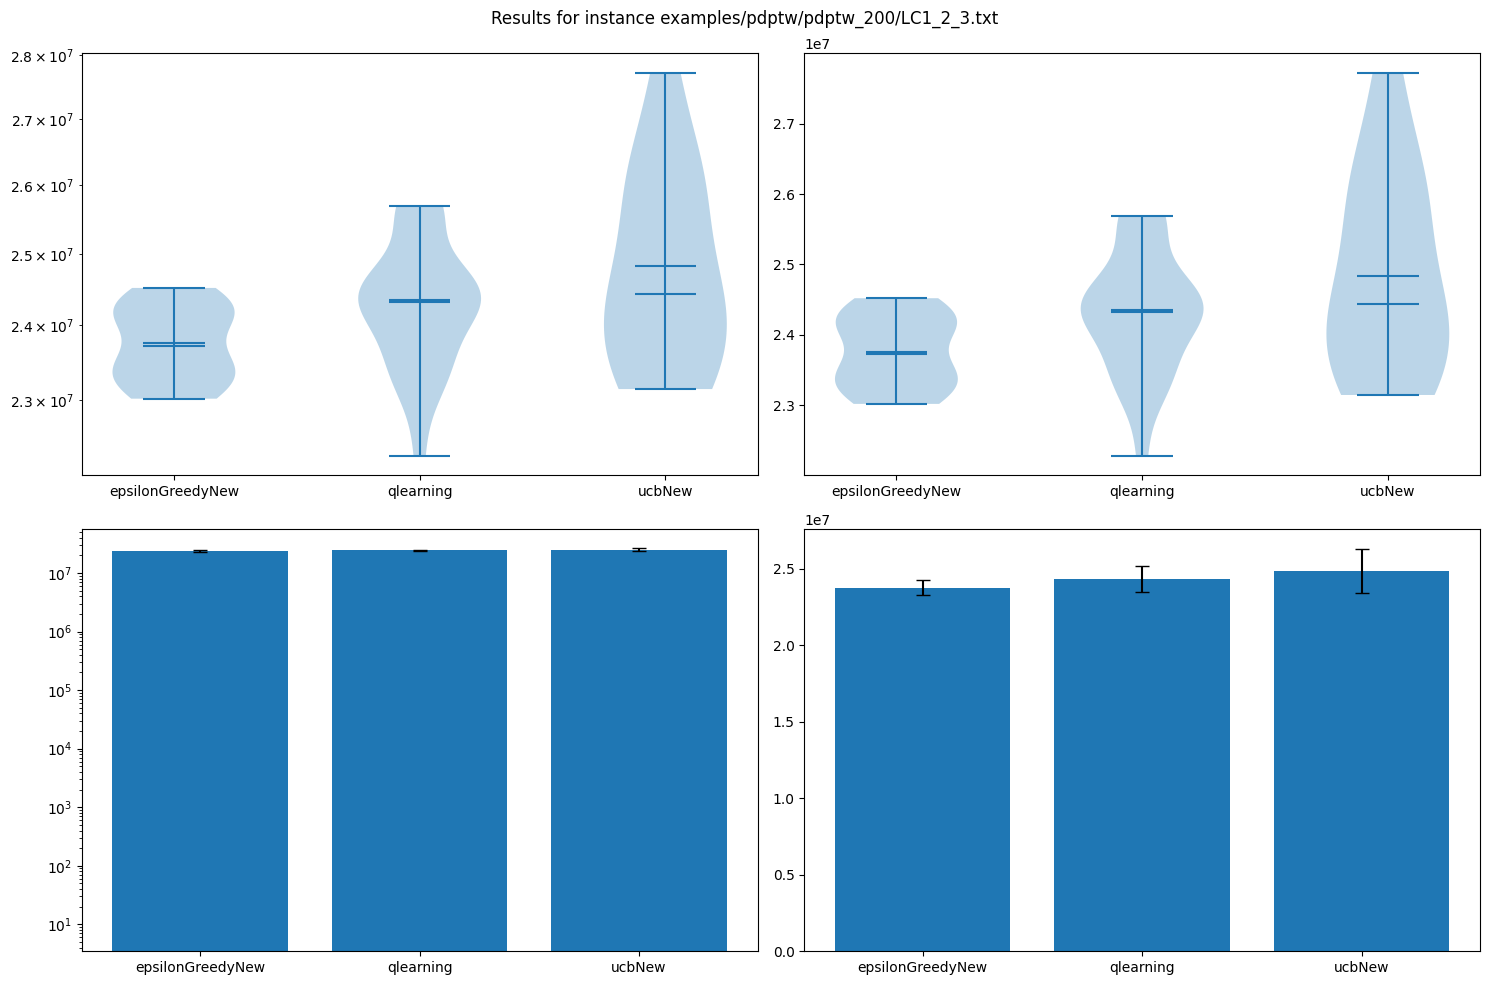

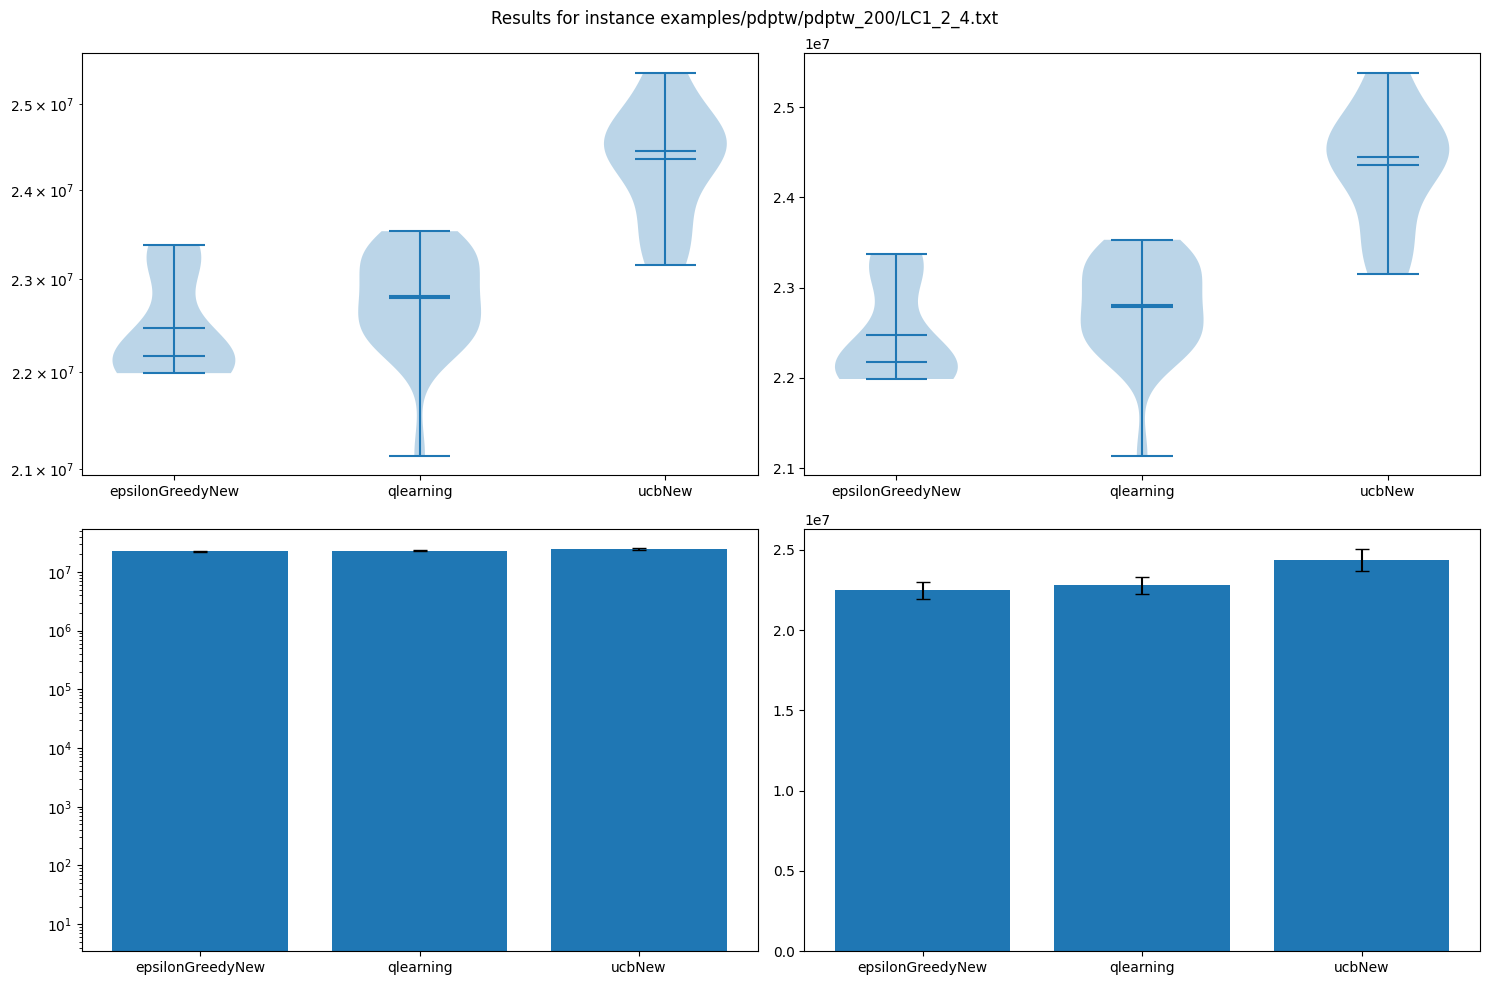

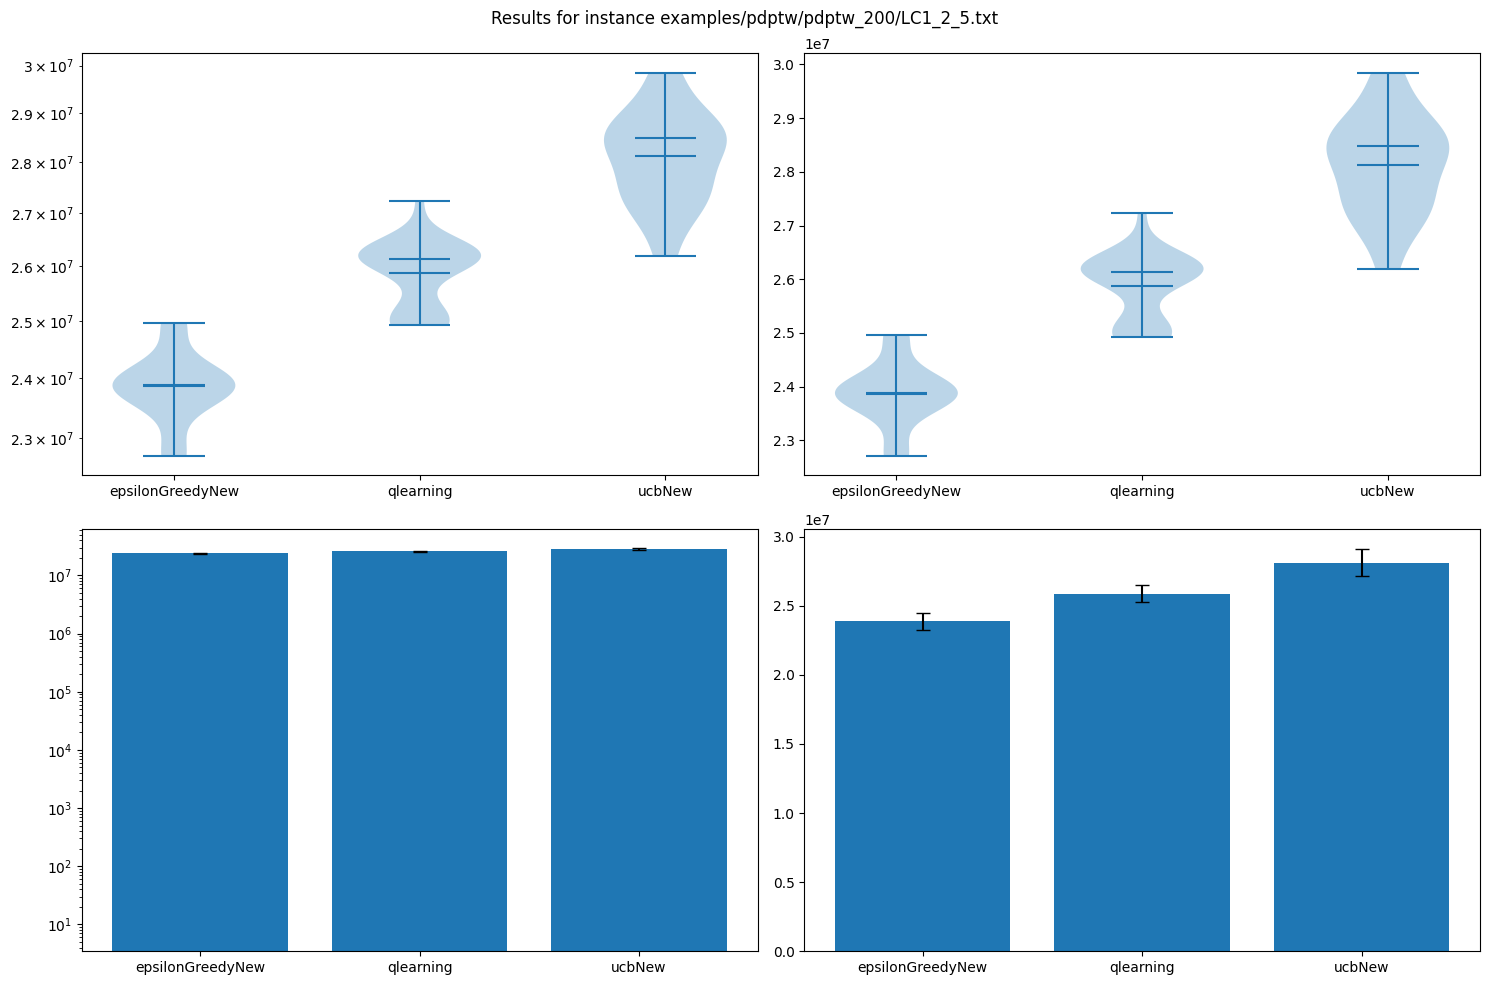

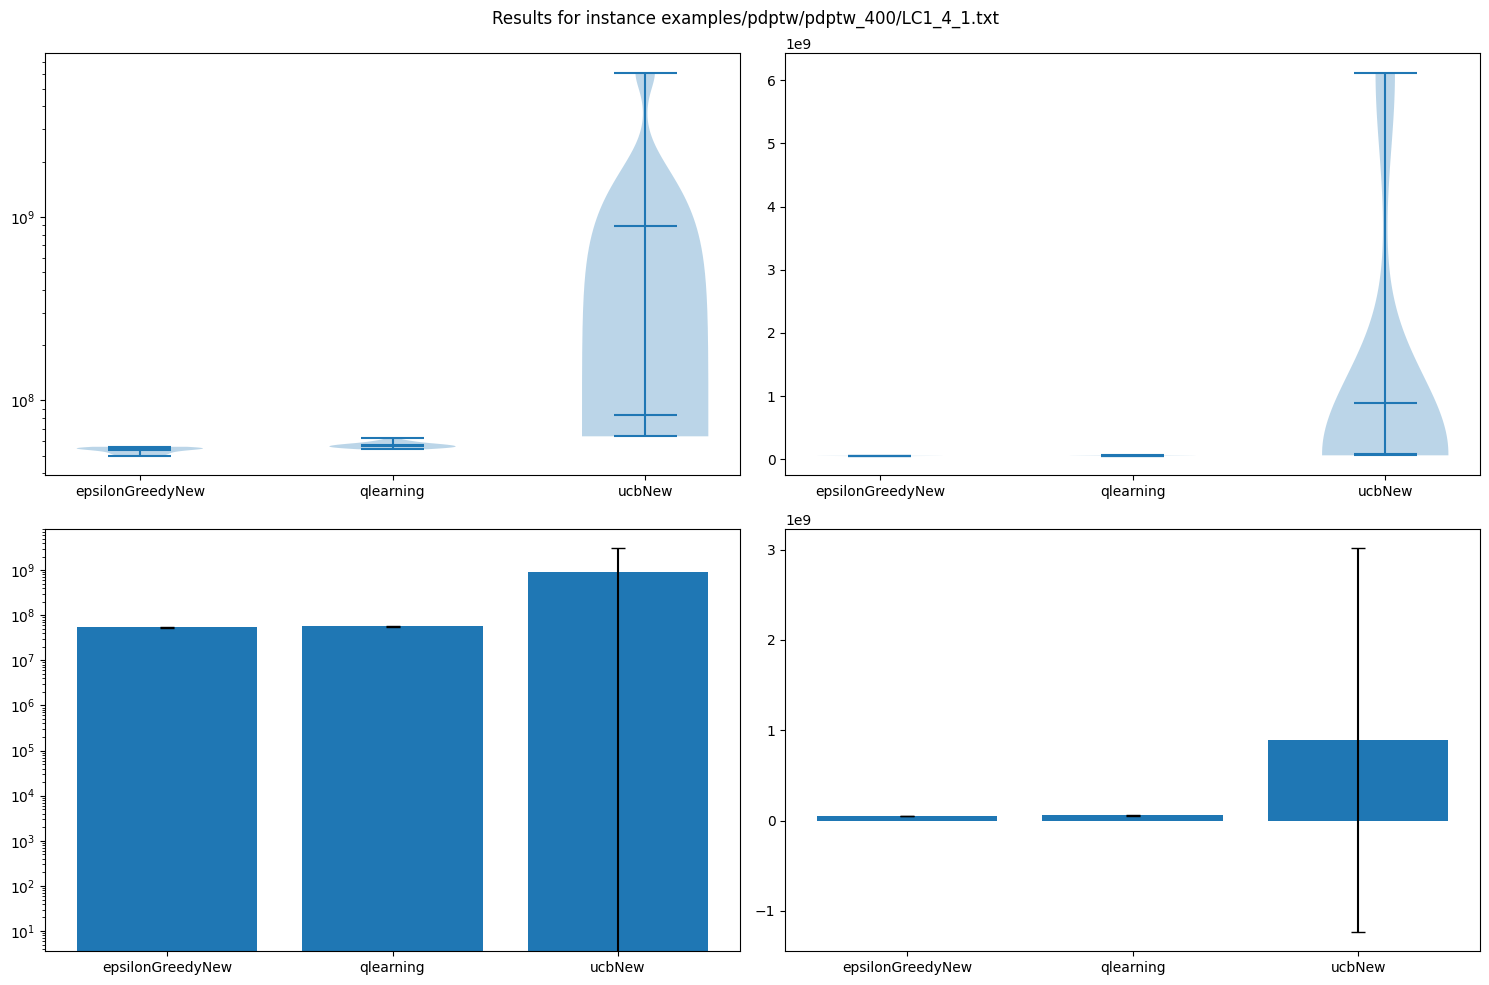

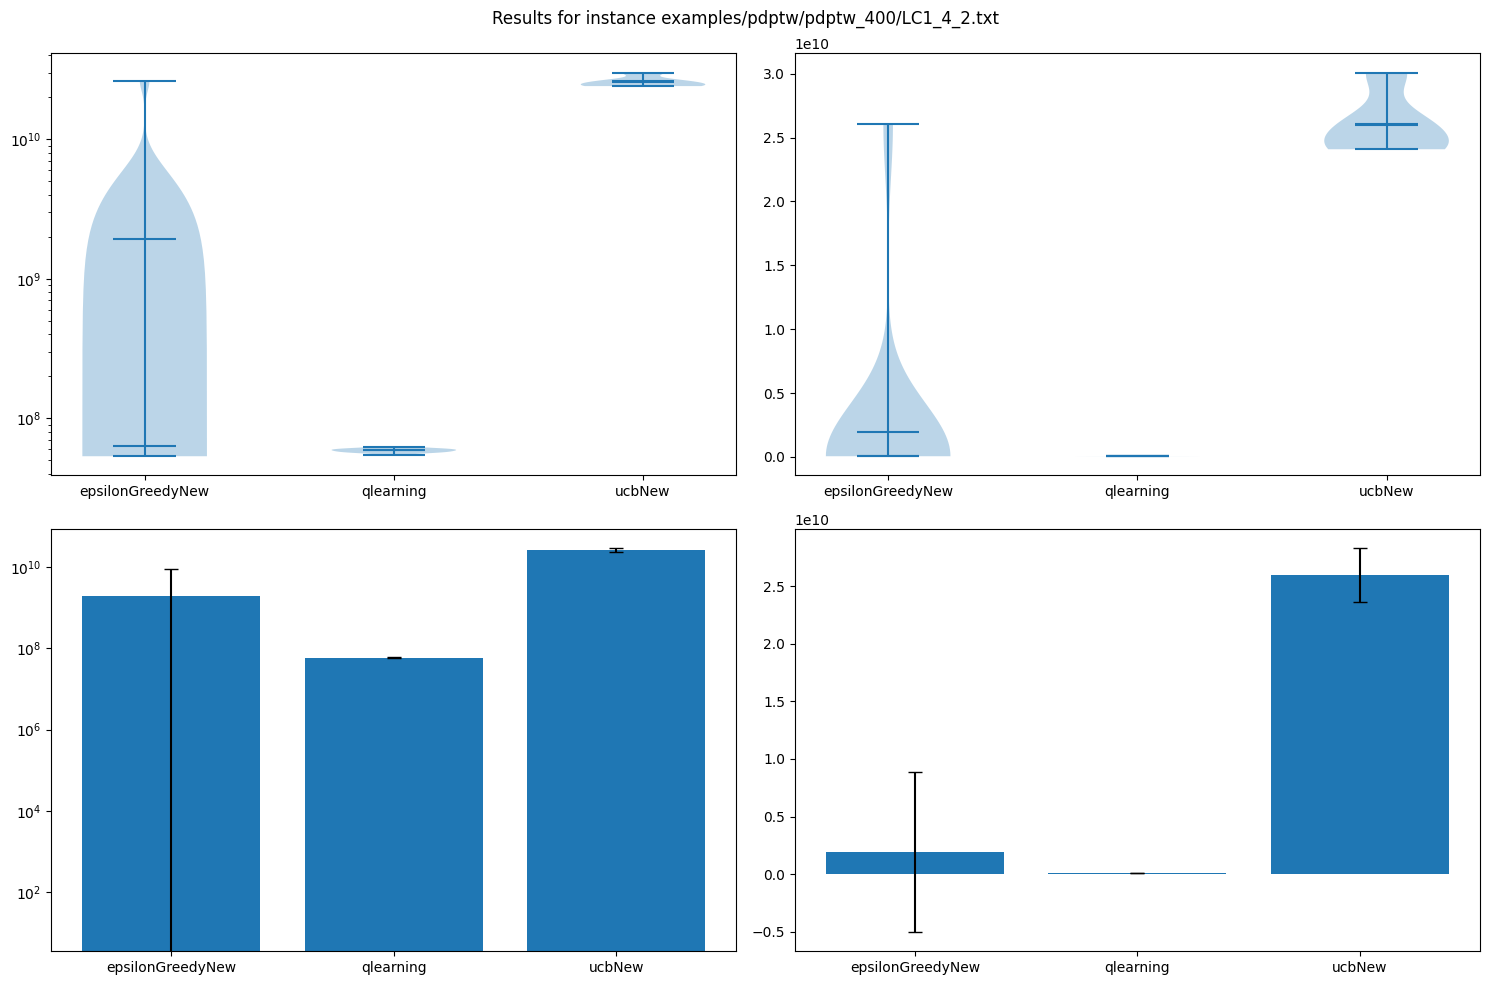

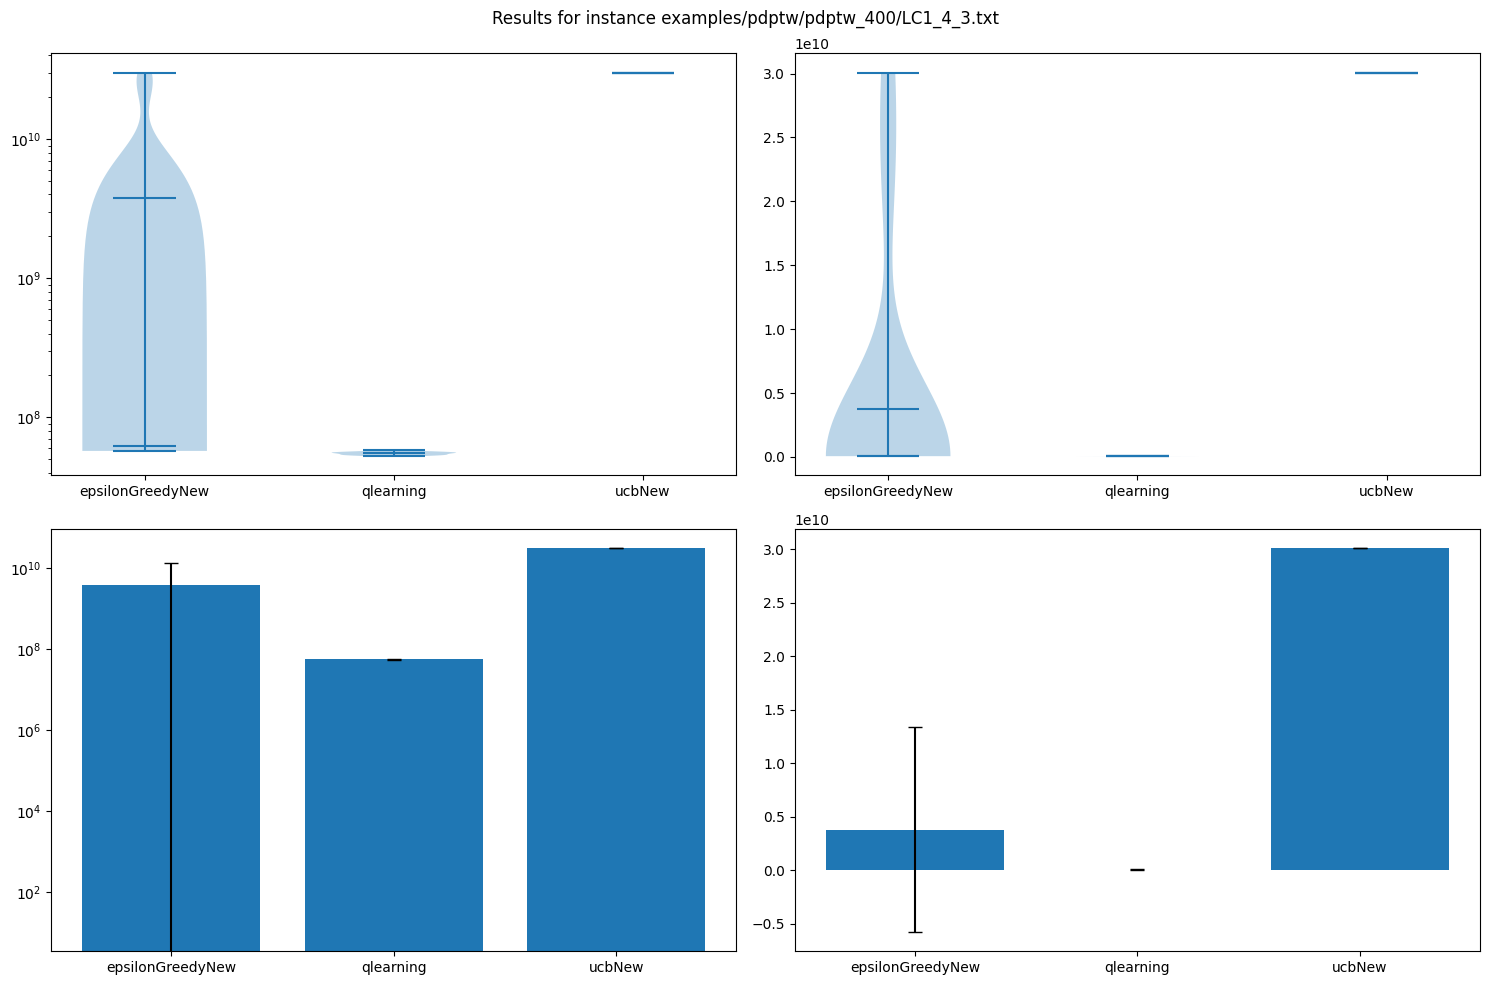

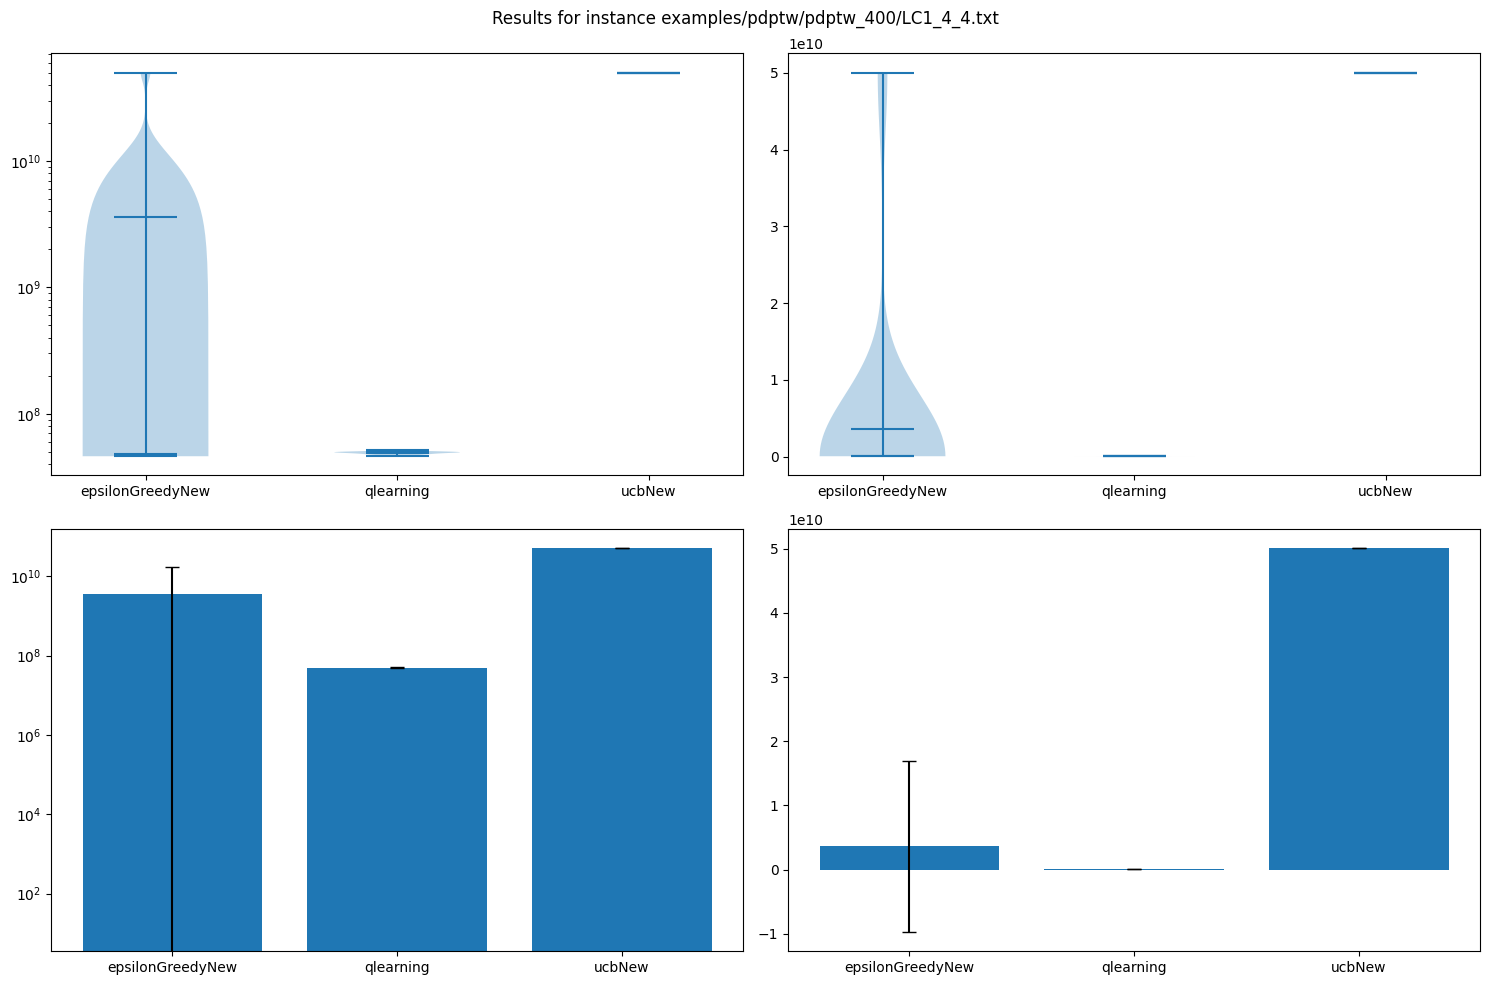

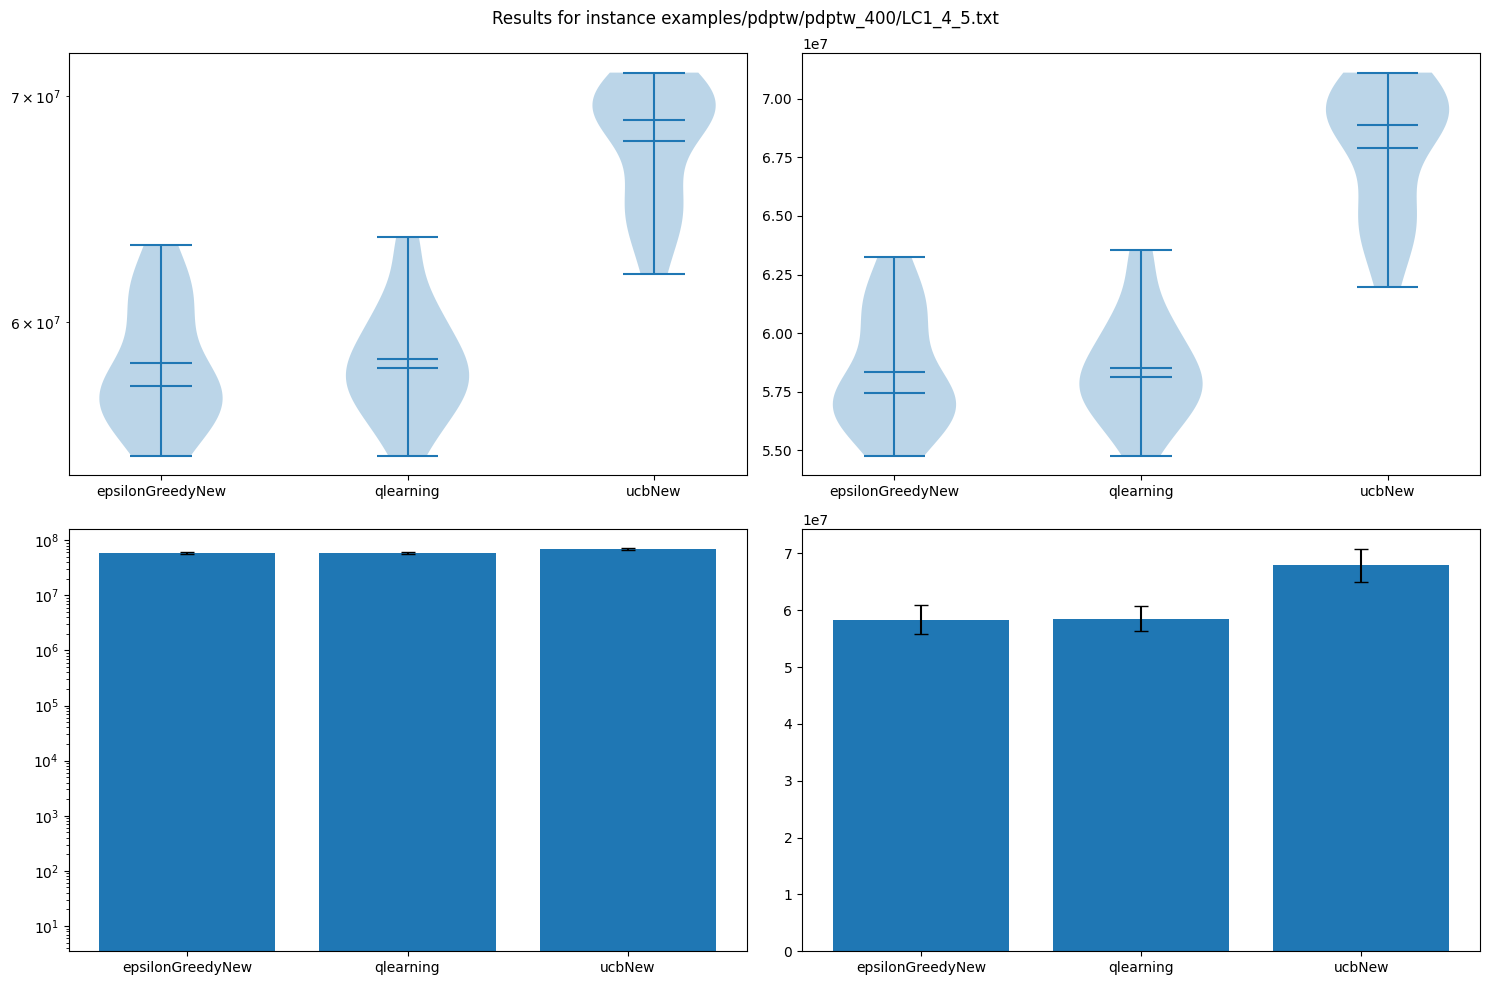

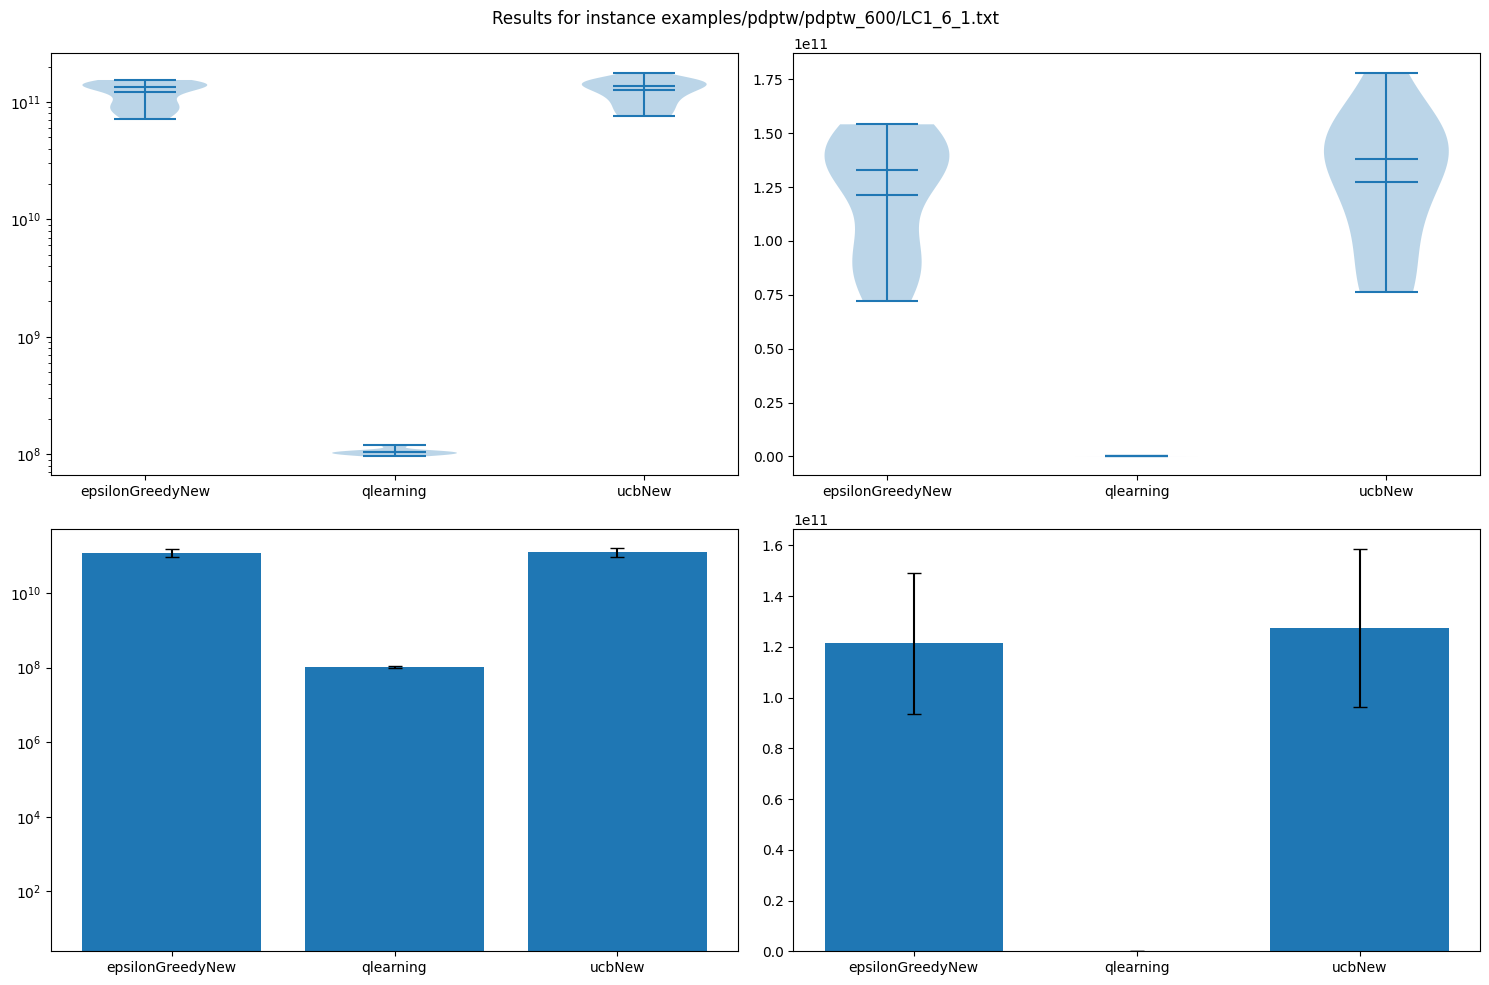

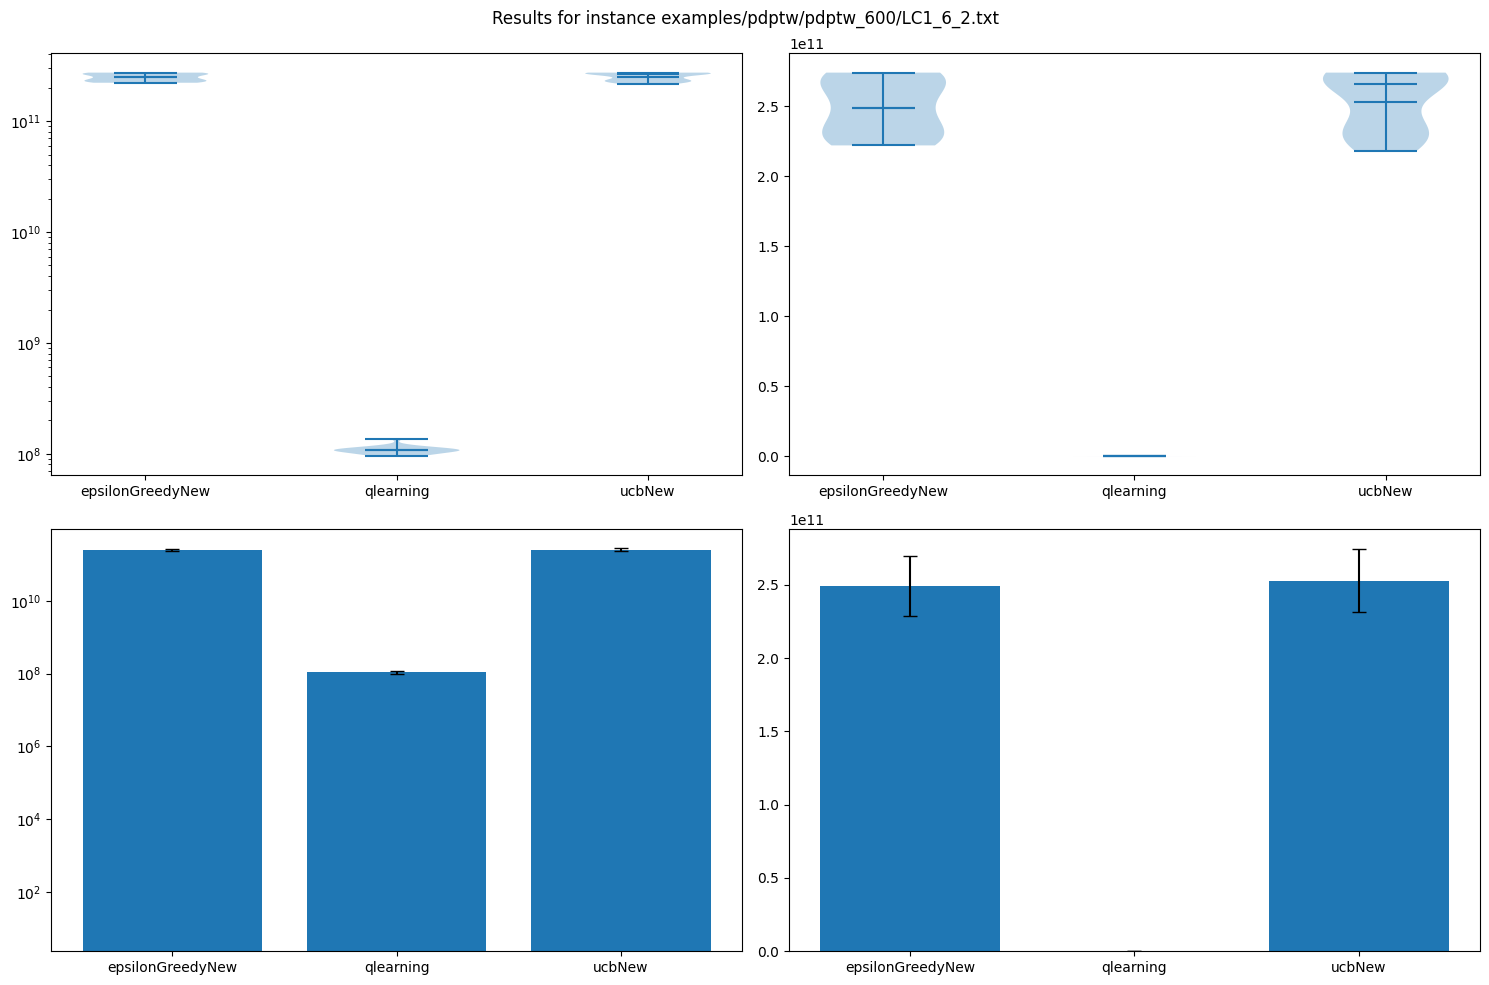

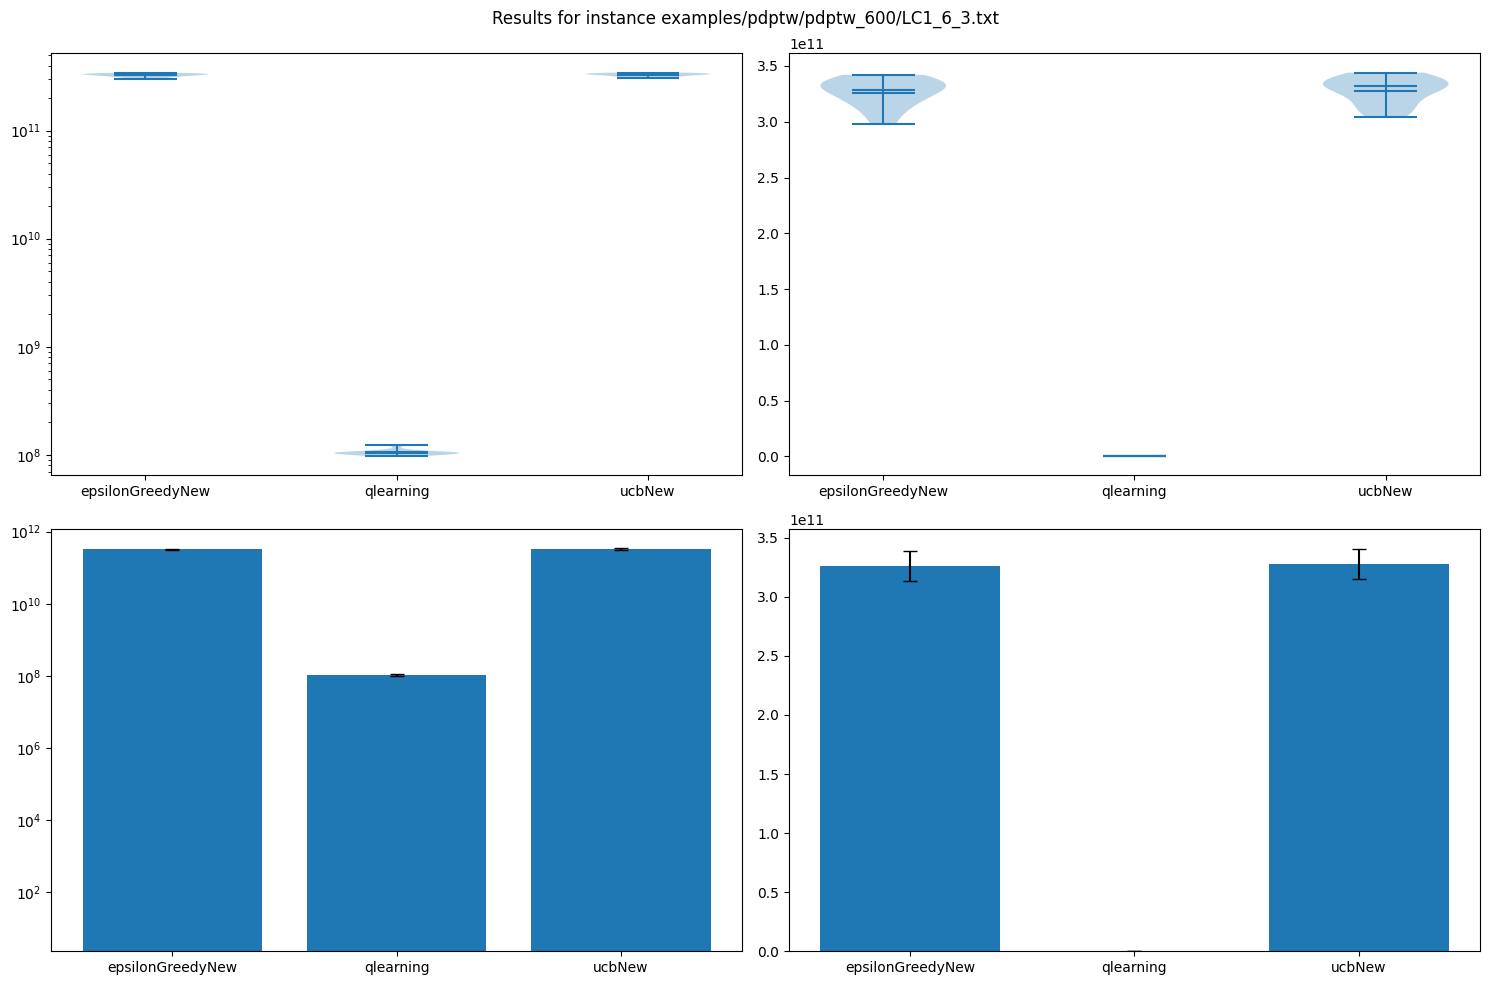

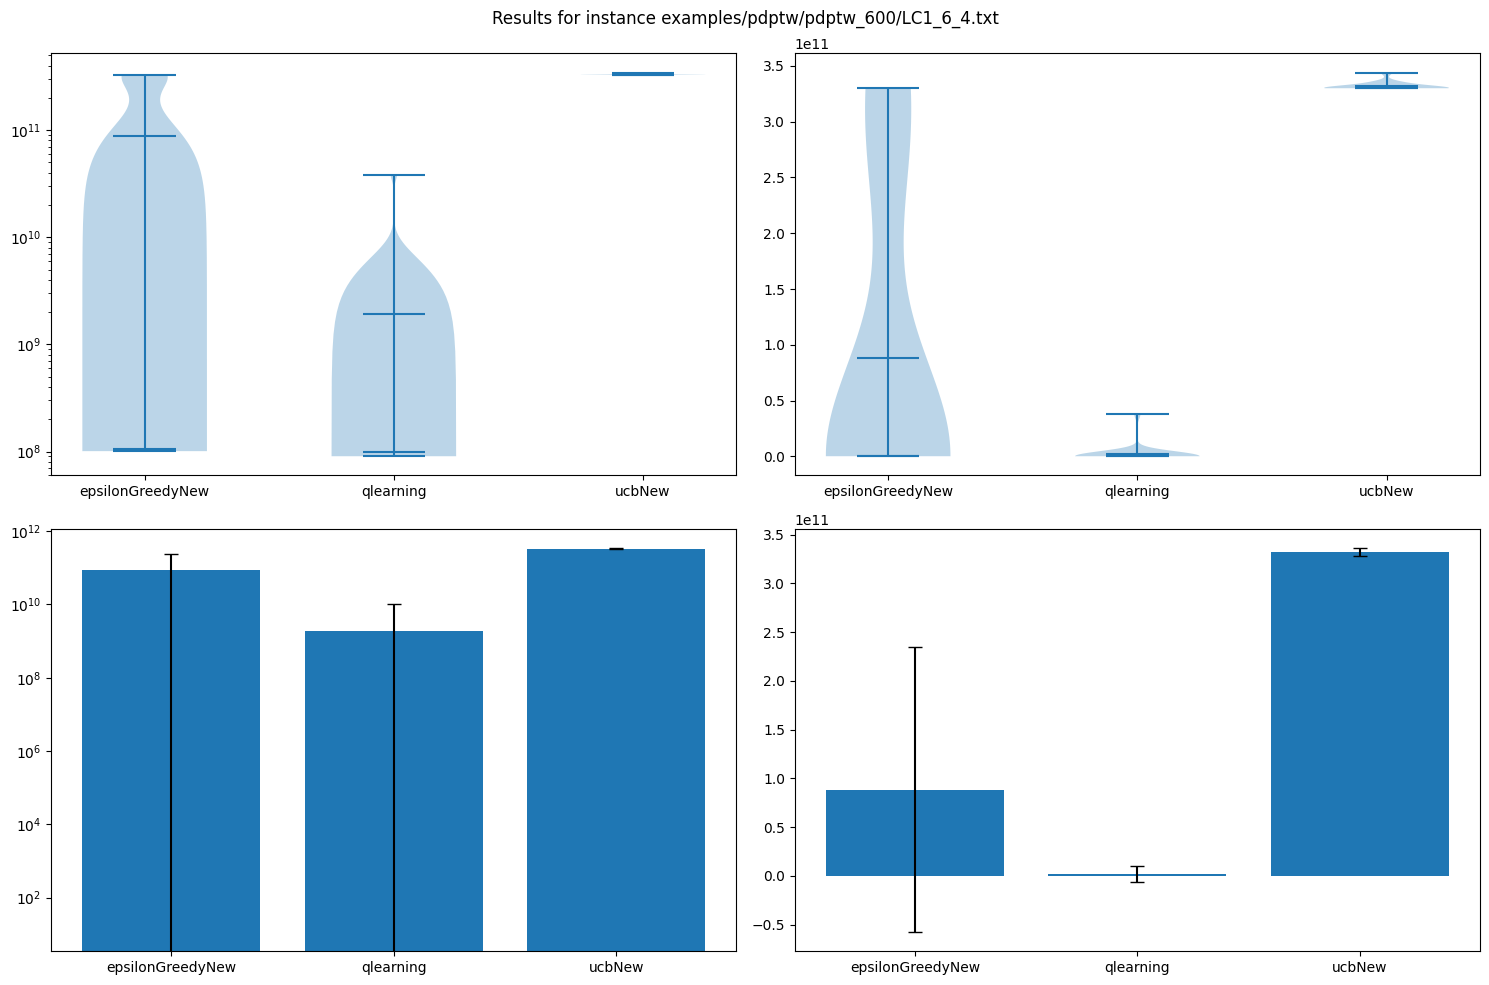

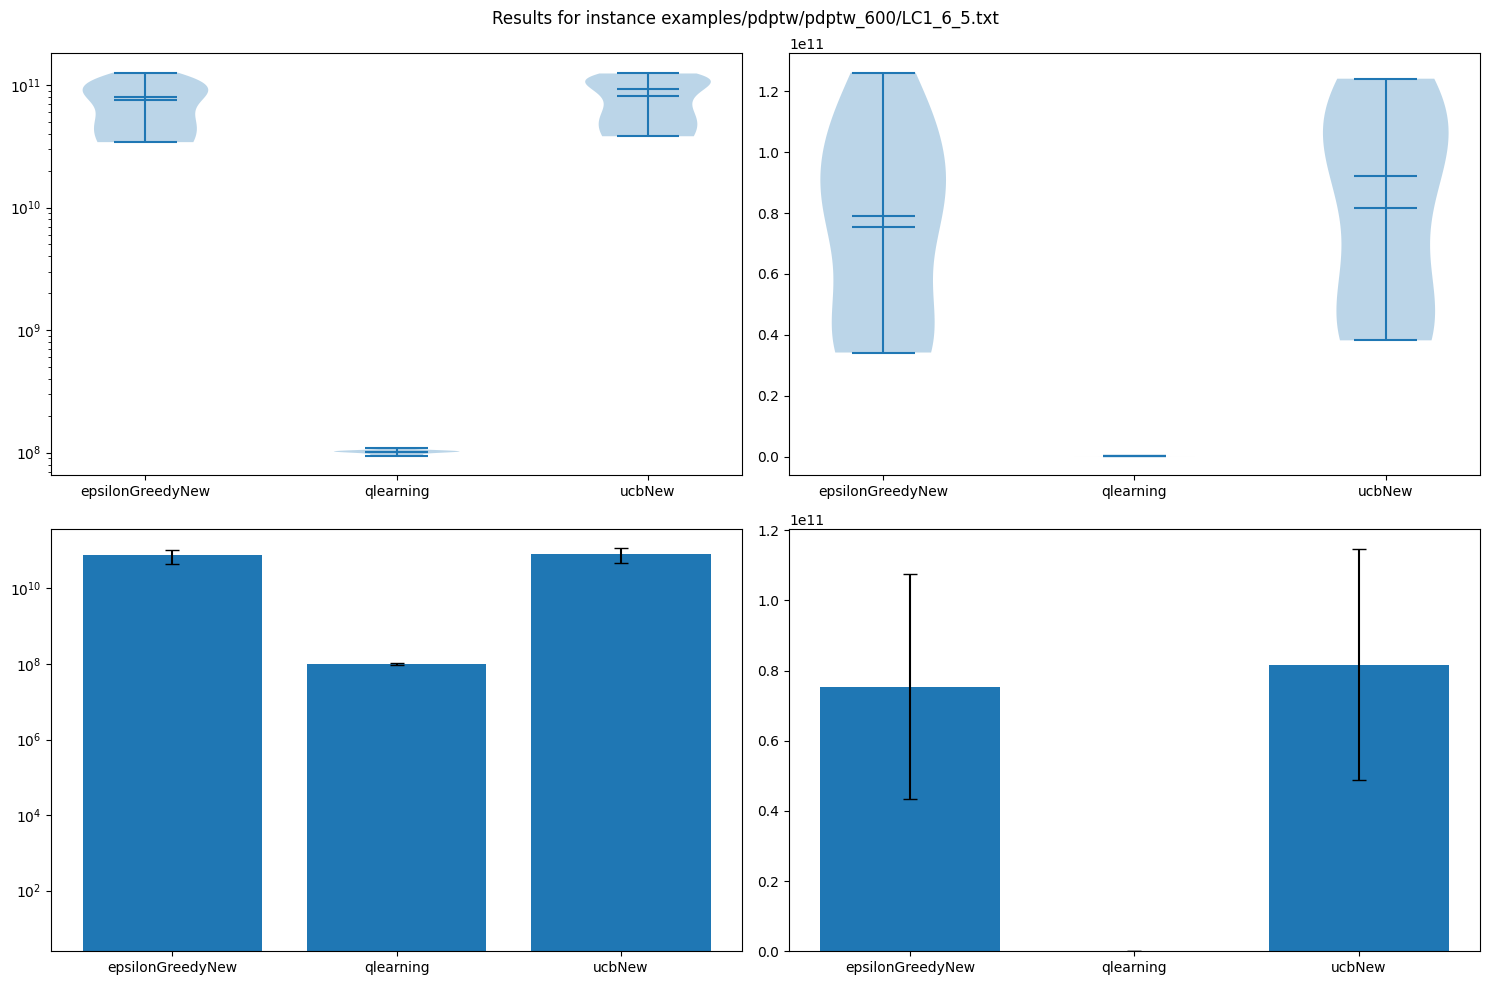

In [49]:
df = pl.read_csv("../../logs/results.csv")
instances = df["instance"].unique().sort()
for instance in instances:
    df_instance = df.filter(df["instance"] == instance)
    # Check if "qlearning" is in the bandit names
    if len(df_instance.filter(pl.col("bandit") == "qlearning")) == 0:
        continue

    fig, axes = plt.subplots(2, 2)
    fig.suptitle(f"Results for instance {instance}")
    fig.set_size_inches(15, 10)
    violin_plot(axes[0, 0], axes[0, 1], df, instance=instance)
    bar_plot(axes[1, 0], axes[1, 1], df, instance=instance)
    plt.tight_layout()
    plt.show()